In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import *

# Intermittent behaviour (chaos)

Consider the map
$$ x_{n+1}=\frac{r + x_n - x_n^2}{1+x_n^3} $$
which has a saddle node bifurcation at $r=0$ with two fixed points for $r>0$ and none for $r<0$

In [7]:
f = lambda x,r: (r + x - x**2)/(1.+x**3)

# Check behaviour when $r\rightarrow 0$ from above

In [18]:
r = 0
x01 = np.sqrt(-1/2+1/2*np.sqrt(1+4*r))
x02 = -np.sqrt(-1/2+1/2*np.sqrt(1+4*r))
Nsteps = 50

# create empty solution vector 
xtraj = np.empty((Nsteps+1,2))
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = np.array([x01,x02])

# iterate map
for i in np.arange(0,Nsteps):
    x01 = f(x01,r)
    x02 = f(x02,r)
    xtraj[i+1,:] = np.array([x01,x02])

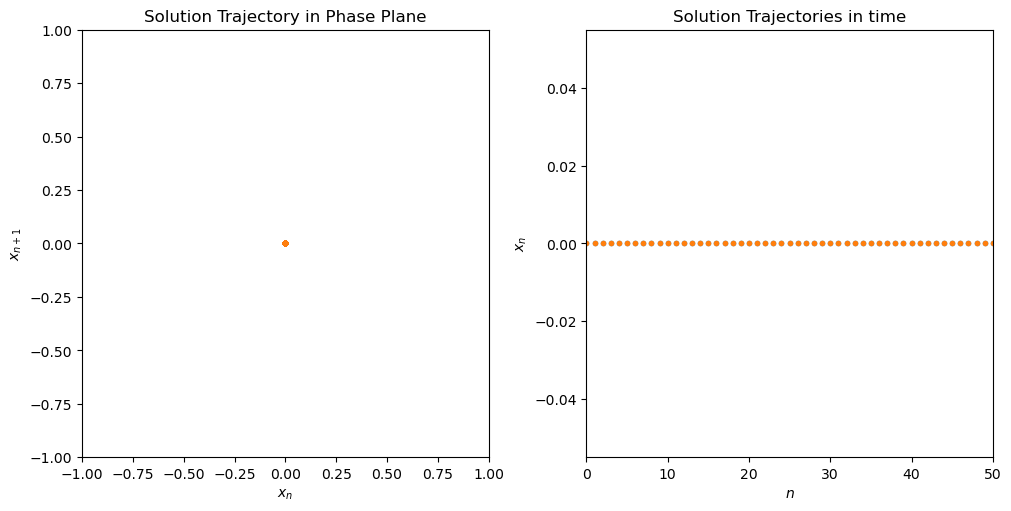

In [19]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(xtraj[:-1,:],xtraj[1:,:],'.')
ax1.set_xlabel("$x_n$")
ax1.set_ylabel("$x_{n+1}$")
ax1.set_title("Solution Trajectory in Phase Plane")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1,1])

ax2 = axs[1] 
ax2.plot(np.arange(0,Nsteps+1),xtraj,'.')
ax2.set_xlabel("$n$")
ax2.set_ylabel("$x_{n}$")
ax2.set_title("Solution Trajectories in time")
ax2.set_xlim([0, Nsteps])

plt.show()

# Check behaviour when $r<0$

In [40]:
r = -0.39599
x0 = 0.
Nsteps = 100

# create empty solution vector 
xtraj = np.empty((Nsteps+1,1))
xtraj[:] = np.nan

# input initial condition
xtraj[0,:] = np.array([x0])

# iterate map
for i in np.arange(0,Nsteps):
    x0 = f(x0,r)
    xtraj[i+1,:] = np.array([x0])

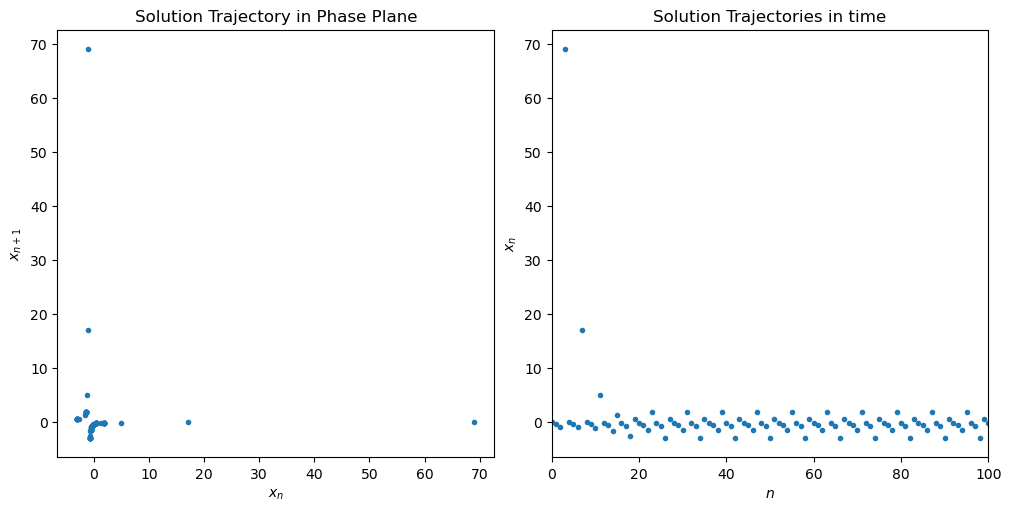

In [41]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(xtraj[:-1,:],xtraj[1:,:],'.')
ax1.set_xlabel("$x_n$")
ax1.set_ylabel("$x_{n+1}$")
ax1.set_title("Solution Trajectory in Phase Plane")
#ax1.set_xlim([-1, 1])
#ax1.set_ylim([-1,1])

ax2 = axs[1] 
ax2.plot(np.arange(0,Nsteps+1),xtraj,'.')
ax2.set_xlabel("$n$")
ax2.set_ylabel("$x_{n}$")
ax2.set_title("Solution Trajectories in time")
ax2.set_xlim([0, Nsteps])

plt.show()

# Calculate Lyapunov exponents

The tangent function of the logistic map can be directly calculated as
$$ \partial f(x_n) = \frac{1-2x_n-3rx_n^2-2x_n^3+x_n^4}{(1+x_n^3)^2}$$

In [31]:
tan_func = lambda x,r: (1-2*x-3*r*x**2-2*x**3+x**4)/(1+x**3)**2
logdf = lambda x,r: np.log(np.abs(tan_func(x,r)))

Lyap = np.mean(logdf(xtraj,r))

print("The Lyapunov exponent for r = " + str(r) + " is " + str(Lyap))

The Lyapunov exponent for r = -0.1 is 0.24645818161758717


## Plot Lyapunov exponents for varying $r$

In [32]:
r_vals = np.linspace(-2,2,300)

Lyaps = np.empty((len(r_vals),1))
Lyaps[:]= np.nan

for j in np.arange(0,len(r_vals)):
    r = r_vals[j]
    x0 = 0.001
    
    # create empty solution vector 
    xtraj = np.empty((Nsteps+1,1))
    xtraj[:] = np.nan
    
    # input initial condition
    xtraj[0,:] = x0
    
    # iterate map
    for i in np.arange(0,Nsteps):
        x0 = f(x0,r)
        xtraj[i+1,:] = x0

    Lyap = np.mean(logdf(xtraj,r))

    Lyaps[j] = Lyap

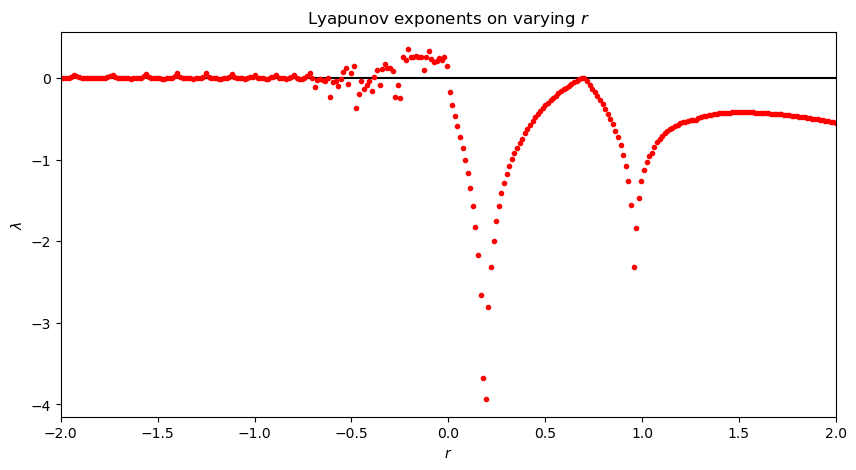

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot([r_vals[0],r_vals[-1]],[0,0],c='k')
plt.plot(r_vals,Lyaps,'.',c='r')
plt.xlabel("$r$")
plt.ylabel("$\lambda$")
plt.title("Lyapunov exponents on varying $r$")
plt.xlim([r_vals[0], r_vals[-1]])
plt.show()